In [1]:
import pandas as pd

In [2]:
Ingredients_df = pd.read_csv("Ingredients.csv")
# .sort_values(by=['Каллории'], ascending=False)
display(Ingredients_df)
# display(type(Ingredients_df.iloc[0, 2]))

FileNotFoundError: [Errno 2] No such file or directory: 'Ingredients.csv'

In [ ]:
price = Ingredients_df['Цена'].tolist()
Weight = Ingredients_df['Граммы'].tolist()
calories = Ingredients_df['Каллории'].tolist()

value = [round(((calories[i]/100)*Weight[i])/price[i], 2) for i in range(0, len(price))]
Ingredients_df.loc[:, ["Каллории за рубль"]] = value
display(Ingredients_df)

,Продукт,Магазин,Цена,Граммы,Соотношение с водой,Каллории,Белки,Жиры,Углеводы,Каллории за рубль
0,Крупа Гречневая,Магнит,36.39,800,0.3,360.0,13.0,2.0,72.0,79.14
1,Макароны,Магнит,21.00,400,0.3,340.0,10.5,1.0,71.0,64.76
2,Рис,ФиксПрайс,89.90,800,0.3,330.0,7.0,1.0,72.0,29.37
3,Пельмени,Магнит,94.95,500,1.0,630.0,7.0,50.0,38.0,33.18
4,Хинкали,Магнит,99.95,500,0.8,630.0,7.0,50.0,38.0,31.52
5,Яйца,КБ,75.00,500,1.0,157.0,13.0,4.2,1.0,10.47
6,Хлеб,Магнит,20.00,300,1.0,273.0,8.1,2.9,82.5,40.95
7,Масло,Светофор,107.40,500,1.0,750.0,0.8,0.8,82.5,34.92
8,Бекон,Светофор,128.00,300,1.0,490.0,10.0,50.0,1.0,11.48


In [ ]:
recepes_df = pd.read_csv("recipes.csv")

for i in range(len(recepes_df)):
    row = recepes_df.iloc[i]

    ingredient_info = Ingredients_df[Ingredients_df["Продукт"] == row["Инградиент"]]

    calories = row["Вес"]/100*ingredient_info["Соотношение с водой"]*ingredient_info["Каллории"]
    recepes_df.loc[i, ["Каллории"]] = round(calories.iloc[0], 2)
    price = (ingredient_info["Цена"]/ingredient_info["Граммы"]) * row["Вес"] * ingredient_info["Соотношение с водой"]
    recepes_df.loc[i, ["Цена"]] = round(price.iloc[0], 2)
    p = row["Вес"]/100*ingredient_info["Соотношение с водой"]*ingredient_info["Белки"]
    recepes_df.loc[i, ["Белки"]] = round(p.iloc[0], 2)
    f = row["Вес"]/100*ingredient_info["Соотношение с водой"]*ingredient_info["Жиры"]
    recepes_df.loc[i, ["Жиры"]] = round(f.iloc[0], 2)
    c = row["Вес"]/100*ingredient_info["Соотношение с водой"]*ingredient_info["Углеводы"]
    recepes_df.loc[i, ["Углеводы"]] = round(c.iloc[0], 2)


display(recepes_df)

,Имя рецепта,Инградиент,Вес,Каллории,Цена,Белки,Жиры,Углеводы
0,Яичница с беконом и бутерами,Яйца,120,188.4,18.00,15.60,5.04,1.20
1,Яичница с беконом и бутерами,Бекон,100,490.0,42.67,10.00,50.00,1.00
2,Яичница с беконом и бутерами,Хлеб,100,273.0,6.67,8.10,2.90,82.50
3,Яичница с беконом и бутерами,Масло,30,225.0,6.44,0.24,0.24,24.75
4,Жареные пельмени с яйцом,Пельмени,400,2520.0,75.96,28.00,200.00,152.00
5,Жареные пельмени с яйцом,Яйца,50,78.5,7.50,6.50,2.10,0.50


In [ ]:
recepes = set(recepes_df["Имя рецепта"].to_list())
for record in recepes:
    recepe = recepes_df[recepes_df["Имя рецепта"] == record]
    display(recepe)
    print(f"Всего каллорий: {sum(recepe['Каллории'])} ({sum(recepe['Белки'])}p, {sum(recepe['Жиры'])}f, {sum(recepe['Углеводы'])}c)")
    print(f"Цена: {sum(recepe['Цена'])}р. ({round(sum(recepe['Каллории'])/sum(recepe['Цена']), 2)})")

    

,Имя рецепта,Инградиент,Вес,Каллории,Цена,Белки,Жиры,Углеводы
0,Яичница с беконом и бутерами,Яйца,120,188.4,18.00,15.60,5.04,1.20
1,Яичница с беконом и бутерами,Бекон,100,490.0,42.67,10.00,50.00,1.00
2,Яичница с беконом и бутерами,Хлеб,100,273.0,6.67,8.10,2.90,82.50
3,Яичница с беконом и бутерами,Масло,30,225.0,6.44,0.24,0.24,24.75


Всего каллорий: 1176.4 (33.94p, 58.18f, 109.45c)
Цена: 73.78р. (15.94)


,Имя рецепта,Инградиент,Вес,Каллории,Цена,Белки,Жиры,Углеводы
4,Жареные пельмени с яйцом,Пельмени,400,2520.0,75.96,28.0,200.0,152.0
5,Жареные пельмени с яйцом,Яйца,50,78.5,7.50,6.5,2.1,0.5


Всего каллорий: 2598.5 (34.5p, 202.1f, 152.5c)
Цена: 83.46р. (31.13)


In [34]:
from app.database.requests import get_ingredient_list
import pandas as pd

t = await get_ingredient_list()
df = pd.DataFrame.from_dict(t).T.rename({0: 'Col_1'}, axis='columns')
# ^ return dict: {ingredient_name: [Calories per gram, Price per gramm, proteins per gram, fats per gram, carbs per gram]}
display(df)

,Col_1,1,2,3,4
Крупа Гречневая,1.08,0.01,0.04,0.01,0.22
Макароны,1.02,0.02,0.03,0.00,0.21
Рис,0.99,0.03,0.02,0.00,0.22
Пельмени,6.30,0.19,0.07,0.50,0.38
Хинкали,5.04,0.16,0.06,0.40,0.30
Яйца,1.57,0.15,0.13,0.04,0.01
Сосиски с сыром,3.86,0.17,0.08,0.38,0.03


<Axes: >

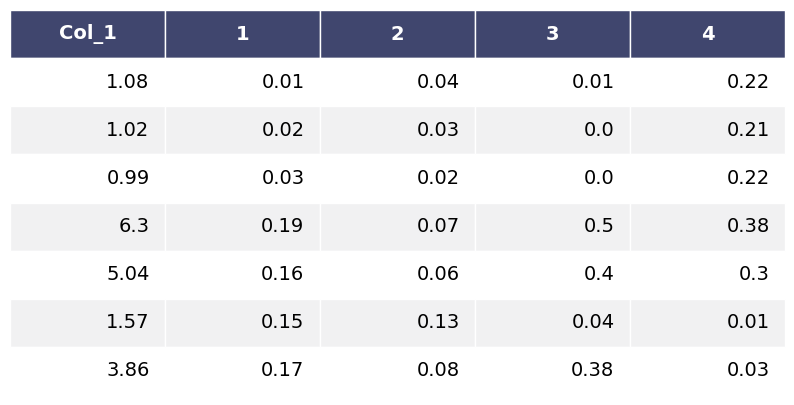

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six




def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=2.0)

In [ ]:
import pandas as pd
import numpy as np
import subprocess

df = pd.DataFrame({'d': [1., 1., 1., 2., 2., 2.],
                   'c': np.tile(['a', 'b', 'c'], 2),
                   'v': np.arange(1., 7.)})
filename = 'out.tex'
pdffile = 'out.pdf'
outname = 'out.png'

template = r'''\documentclass[preview]{{standalone}}
\usepackage{{booktabs}}
\begin{{document}}
{}
\end{{document}}
'''

with open(filename, 'wb') as f:
    f.write(template.format(df.to_latex()))

subprocess.call(['pdflatex', filename])
subprocess.call(['convert', '-density', '300', pdffile, '-quality', '90', outname])

In [36]:
import plotly.figure_factory as ff
import pandas as pd

df = pd.DataFrame()
df["date"] = ["2016-04-01", "2016-04-02", "2016-04-03", "2016-04-03", "2016-04-03"]
df["calories"] = [2200, 2100, 1500, 2200, 2100]
df["sleep hours"] = [8, 7.5, 8.2, 3, 4]
df["gym"] = [True, False, False, True, True]

fig = ff.create_table(df)
fig.update_layout(
    autosize=False,
    width=500,
    height=200,
)

fig.write_image("table_plotly.png", scale=2)


In [20]:
from tabulate import tabulate
from app.database.requests import get_ingredient_list
from pprint import pprint
t = await get_ingredient_list()
names = t.keys()
pprint(list(names))
pprint(list(t.values()))
# print(tabulate(table, headers, tablefmt="presto"))

['Крупа Гречневая',
 'Макароны',
 'Рис',
 'Пельмени',
 'Хинкали',
 'Яйца',
 'Сосиски с сыром']
[[1.08, 0.01, 0.04, 0.01, 0.22],
 [1.02, 0.02, 0.03, 0.0, 0.21],
 [0.99, 0.03, 0.02, 0.0, 0.22],
 [6.3, 0.19, 0.07, 0.5, 0.38],
 [5.04, 0.16, 0.06, 0.4, 0.3],
 [1.57, 0.15, 0.13, 0.04, 0.01],
 [3.86, 0.17, 0.08, 0.38, 0.03]]
